<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [VAE3] - Analysis of the VAE's latent space of MNIST dataset
<!-- DESC --> Visualization and analysis of the VAE's latent space of the dataset MNIST
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - First data generation from **latent space** 
 - Understanding of underlying principles
 - Model management

Here, we don't consume data anymore, but we generate them ! ;-)

## What we're going to do :

 - Load a saved model
 - Reconstruct some images
 - Latent space visualization
 - Matrix of generated images


## Step 1 - Init python stuff

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from modules.models    import VAE
from modules.datagen   import MNIST

import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
import fidle.pwk as pwk

run_dir = './run/VAE2.001'
datasets_dir = pwk.init('VAE3', run_dir)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.20
Notebook id          : VAE3
Run time             : Sunday 21 March 2021, 18:25:36
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/datasets/fidle
Run dir              : ./run/VAE2.001
Update keras cache   : False
Save figs            : True
Path figs            : ./run/VAE2.001/figs


In [2]:
scale = 1
seed  = 123

## Step 2 - Get data

In [3]:
x_data, y_data, _,_ = MNIST.get_data(seed=seed, scale=scale, train_prop=1 )

Seeded (123)
Dataset loaded.
Concatenated.
Shuffled.
rescaled (1).
Normalized.
Reshaped.
splited (1).
x_train shape is  :  (70000, 28, 28, 1)
x_test  shape is  :  (0, 28, 28, 1)
y_train shape is  :  (70000,)
y_test  shape is  :  (0,)
Blake2b digest is :  0c903710d4d28b01c174


## Step 3 - Reload best model

In [4]:
vae=VAE()
vae.reload(f'{run_dir}/models/best_model')

Fidle VAE is ready :-)  loss_weights=[1, 1]
Reloaded.


## Step 4 - Image reconstruction

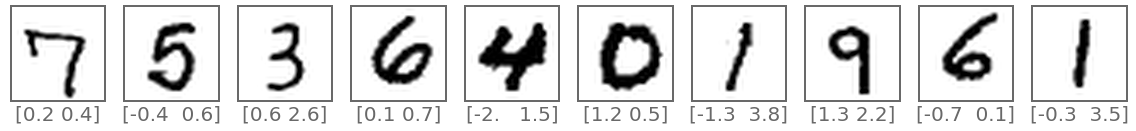

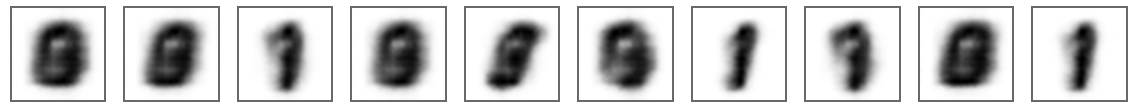

In [5]:
# ---- Select few images

x_show = pwk.pick_dataset(x_data, n=10)

# ---- Get latent points and reconstructed images

z_mean, z_var, z  = vae.encoder.predict(x_show)
x_reconst         = vae.decoder.predict(z)

# ---- Show it

labels=[ str(np.round(z[i],1)) for i in range(10) ]
pwk.plot_images(x_show,    labels, indices='all', columns=10, x_size=2,y_size=2, save_as='01-original')
pwk.plot_images(x_reconst, None  , indices='all', columns=10, x_size=2,y_size=2, save_as='02-reconstruct')


## Step 5 - Visualizing the latent space

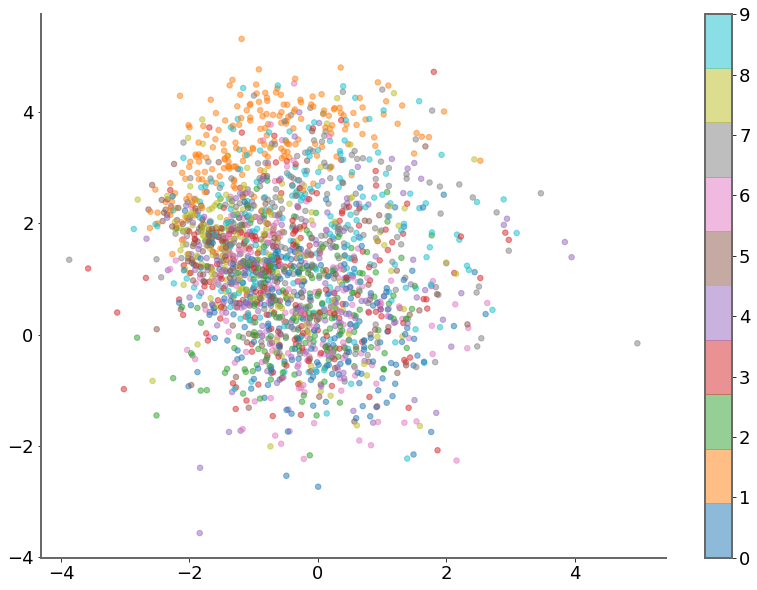

In [6]:
n_show = 20000

# ---- Select images

x_show, y_show = pwk.pick_dataset(x_data,y_data, n=n_show)

# ---- Get latent points

z_mean, z_var, z = vae.encoder.predict(x_show)

# ---- Show them

fig = plt.figure(figsize=(14, 10))
plt.scatter(z[:, 0] , z[:, 1], c=y_show, cmap= 'tab10', alpha=0.5, s=30)
plt.colorbar()
pwk.save_fig('03-Latent-space')
plt.show()

## Step 6 - Generate from latent space

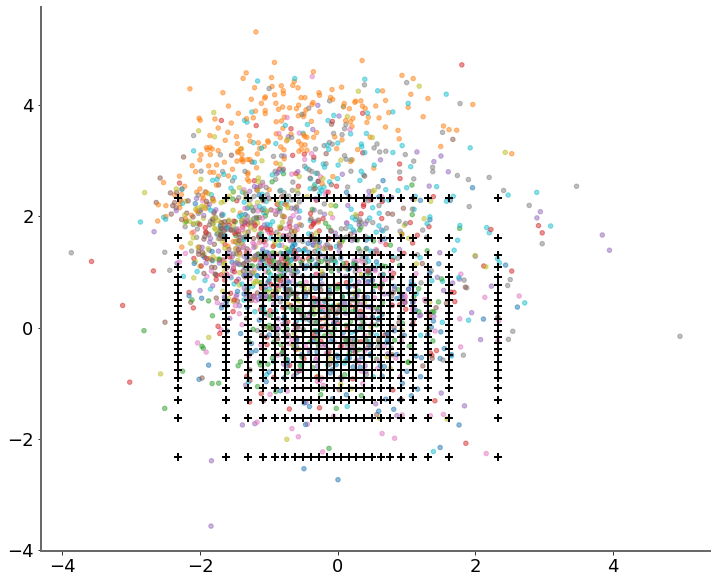

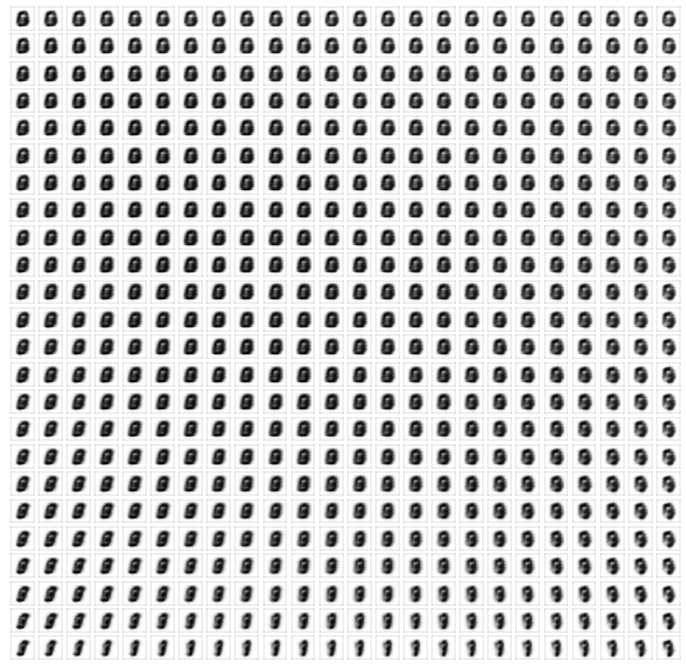

In [7]:
grid_size=24

# ---- Draw a ppf grid
#
grid=[]
for y in scipy.stats.norm.ppf(np.linspace(0.01, 0.99, grid_size)):
    for x in scipy.stats.norm.ppf(np.linspace(0.01, 0.99, grid_size)):
        grid.append( (x,y) )
grid=np.array(grid)

# ---- Draw latentspoints and grid

fig = plt.figure(figsize=(12, 10))
plt.scatter(z[:, 0] , z[:, 1], c=y_show, cmap= 'tab10', alpha=0.5, s=20)
plt.scatter(grid[:, 0] , grid[:, 1], c = 'black', s=60, linewidth=2, marker='+', alpha=1)
pwk.save_fig('04-Latent-grid')
plt.show()

# ---- Plot grid corresponding images

x_reconst = vae.decoder.predict([grid])
pwk.plot_images(x_reconst, indices='all', columns=grid_size, x_size=0.5,y_size=0.5, y_padding=0,spines_alpha=0.1, save_as='05-Latent-morphing')


In [8]:
pwk.end()

End time is : Sunday 21 March 2021, 18:26:09
Duration is : 00:00:33 326ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>